In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
#qids = ['boss_d02','boss_02']
#qids = ['s16_d02','s16_d03']
#qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
kwargs = {'snmin':0,'snmax':3}
qid_dn = ['comb_d','comb_n']

In [24]:
#tools_cmbalm.alm_comb(qids_d,qid_dn[0],overwrite=True,verbose=False,mtype=['T'],**kwargs)
#tools_cmbalm.alm_comb(qids_n,qid_dn[1],overwrite=True,verbose=False,mtype=['T'],**kwargs)

In [25]:
#tools_cmbalm.alm_supfac(qid_dn,w1=1.,overwrite=True,verbose=False,**kwargs)

In [26]:
#tools_cmbalm.alm2aps(qid_dn,overwrite=True,verbose=False,mtype=['T'],Wn=np.ones(5),**kwargs)

In [7]:
aobj = {q: local.init_analysis_params(qid=q,**kwargs) for q in qid_dn+['diff_dn']}

In [29]:
mcl = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1]*local.Tcmb**2 for q in qid_dn}
ncl = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1]*local.Tcmb**2 for q in qid_dn}
ocl = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1]*local.Tcmb**2 for q in qid_dn}
rcl = {q: (np.loadtxt(aobj[q].fsup)).T[2] for q in qid_dn}

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


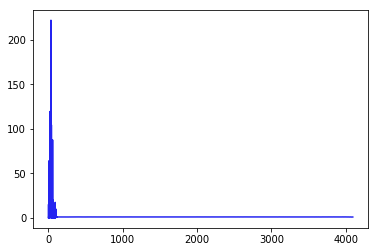

In [18]:
l = aobj['comb_d'].l
plot((mcl['comb_d']-ncl['comb_d'])/(mcl['comb_n']-ncl['comb_n']))

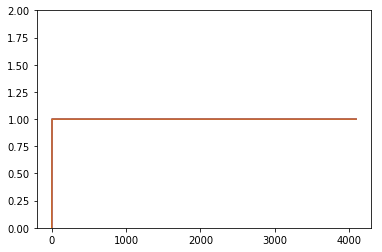

In [30]:
for q in qid_dn:
    l = aobj[q].l
    ylim(0,2)
    plot(rcl[q])

In [11]:
#for qid in qids_d+qids_n:
#    mask_iv = tools_cmbalm.load_mask(qid)
#    mask_hp = enmap.to_healpix(mask_iv)
#    tools_cmbalm.get_wfactor(mask_hp)

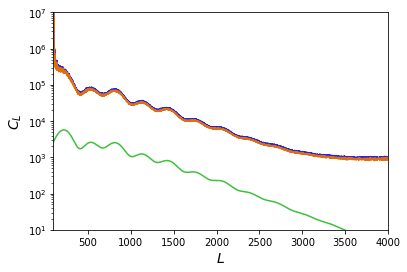

In [20]:
for q in qid_dn:
    pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e7,xmin=100,xmax=4000)
    l = aobj[q].l
    s = l**2/np.pi/2.
    if q=='comb_d': w2 = 1.
    if q=='comb_n': w2 = 1.
    plot(l,s*(mcl[q]-ncl[q])*w2)
    #plot(l,s*ncl[q]/w2)
    #plot(l,s*ocl[q]/w2)
#plot(l,s*(ocl['comb_n']-ocl['comb_d']))
plot(l,s*aobj[q].lcl[0,:]*local.Tcmb**2)

In [13]:
tools_cmbalm.diff_day_night(overwrite=True,verbose=True,mtype=['T'],**kwargs)

100%|██████████| 4/4 [00:20<00:00,  5.09s/it]


save averaged diff day-night spectrum


In [21]:
mcl_diff = (np.loadtxt(aobj['diff_dn'].fscl['c'])).T[1]*local.Tcmb**2
ncl_diff = (np.loadtxt(aobj['diff_dn'].fscl['n'])).T[1]*local.Tcmb**2
scl_diff = (np.loadtxt(aobj['diff_dn'].fscl['s'])).T[1]*local.Tcmb**2
ocl_diff = (np.loadtxt(aobj['diff_dn'].fcls['c'][0])).T[1]*local.Tcmb**2

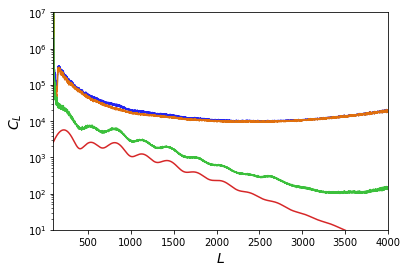

In [22]:
pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e7,xmin=100,xmax=4000)
l = aobj['diff_dn'].l
s = l**2/np.pi/2.
plot(l,s*mcl_diff)
plot(l,s*ncl_diff)
plot(l,s*scl_diff)
#plot(l,s*ocl_diff)
plot(l,s*aobj['diff_dn'].lcl[0,:]*local.Tcmb**2)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


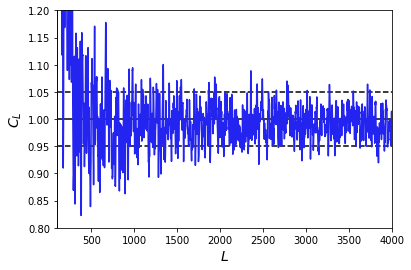

In [23]:
pl.plot_1dstyle(ymin=.8,ymax=1.2,xmin=100,xmax=4000)
axhline(1.05,ls='--',color='k')
axhline(1,color='k')
axhline(.95,ls='--',color='k')
plot(l,ocl_diff/mcl_diff)